In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
bank = pd.read_csv("data/bank-additional-full.csv", sep=';')

# Define all column names.
columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
          'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
          'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Print all unique values for each column
for col in columns:
    print('Unique values for ' + col)
    print(bank[col].unique())
    print('')

Unique values for age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values for job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values for marital
['married' 'single' 'divorced' 'unknown']

Unique values for education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values for default
['no' 'unknown' 'yes']

Unique values for housing
['no' 'yes' 'unknown']

Unique values for loan
['no' 'yes' 'unknown']

Unique values for contact
['telephone' 'cellular']

Unique values for month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values for day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

Uni

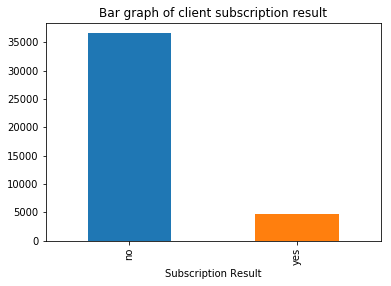

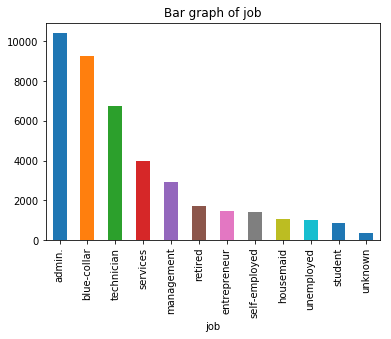

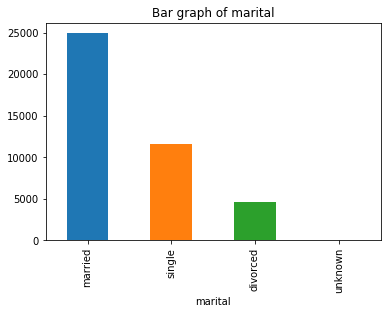

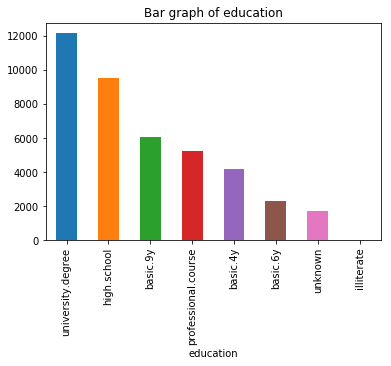

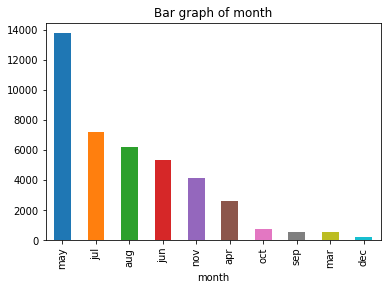

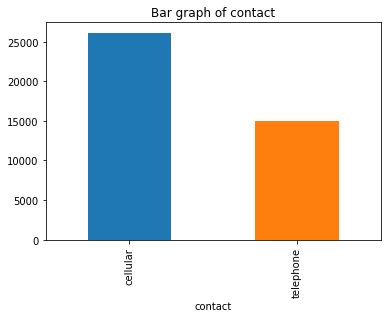

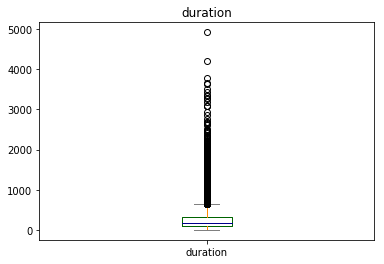

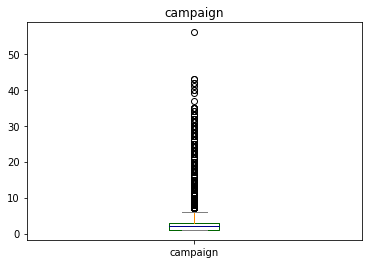

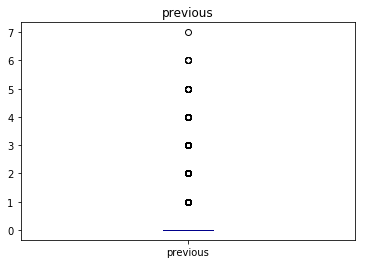

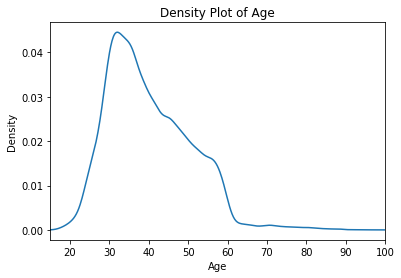

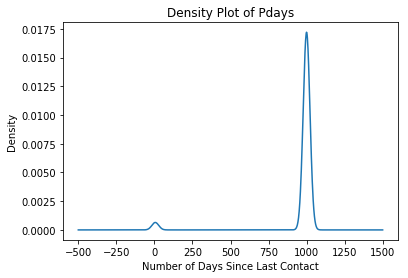

In [2]:
# Plot the target variable.
bank['y'].value_counts().plot(kind='bar')
plt.title('Bar graph of client subscription result')
plt.xlabel('Subscription Result')
plt.show()

# Create an array of categorial variables.
categoricalCols = ['job', 'marital', 'education', 'month', 'contact']

# Plot histograms of all categorial variables.
for cols in categoricalCols:
    bank[cols].value_counts().plot(kind='bar')
    plt.title('Bar graph of ' + cols)
    plt.xlabel(cols)
    plt.show()
    

# create an array of continuous variables.
continuousCols  = ['duration', 'campaign', 'previous']

# Assign colours for the boxplots.
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

# Plot boxplots of all continuous variables.
for cols in continuousCols:
    bank[cols].plot(kind='box', color=color)
    plt.title(cols)
    plt.show()


# Plot density plot of age.
bank['age'].plot(kind='density')
plt.xlim(15, 100)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.show()

# Plot density plot of pdays.
bank['pdays'].plot(kind='density')
plt.title('Density Plot of Pdays')
plt.xlabel('Number of Days Since Last Contact')
plt.show()

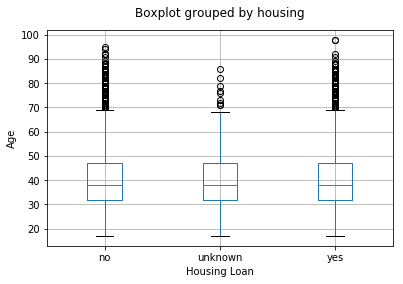

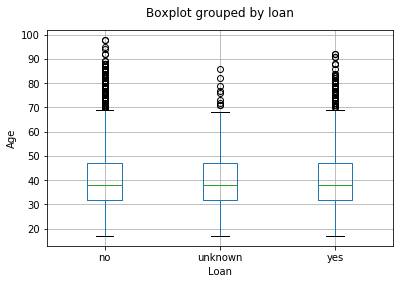

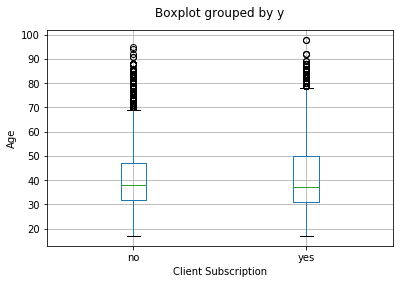

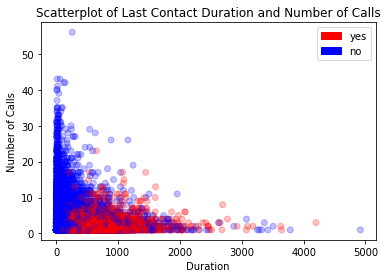

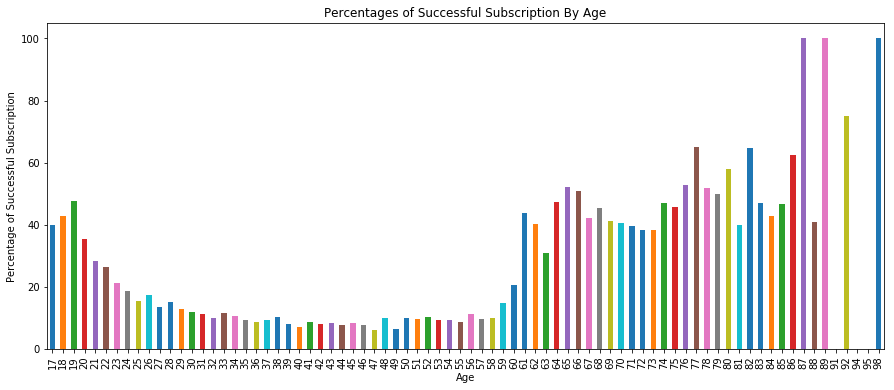

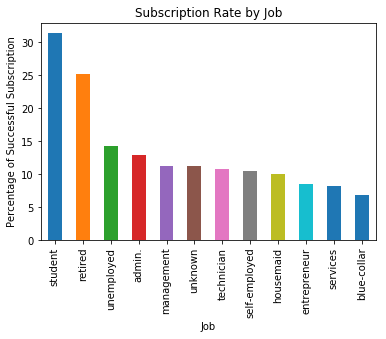

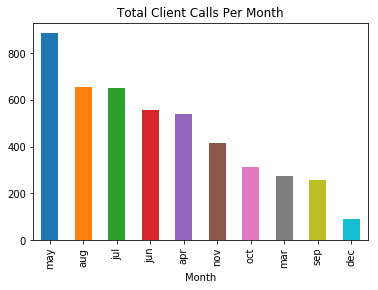

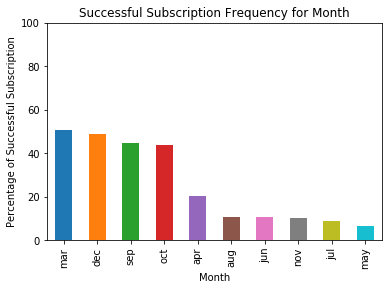

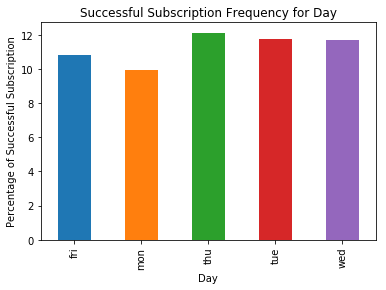

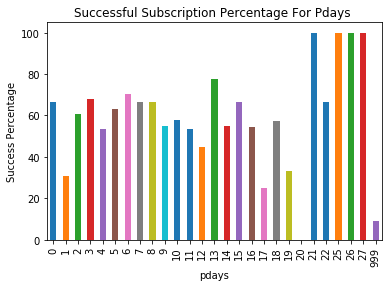

In [3]:
# Boxplot of Age by Housing.
bank.boxplot(column='age', by='housing')
# Add necessary labels to the plot
plt.xlabel('Housing Loan')
plt.ylabel('Age')
plt.title('')
plt.show()

# Boxplot of Age by Loan.
bank.boxplot(column='age', by='loan')
# Add necessary labels to the plot
plt.xlabel('Loan')
plt.ylabel('Age')
plt.title('')
plt.show()

# Boxplot of Age by Target variable.
bank.boxplot(column='age', by='y')
# Add necessary labels to the plot
plt.xlabel('Client Subscription')
plt.ylabel('Age')
plt.title('')
plt.show()

# Scatter plot of duration and term deposit.
# Code the labels for the legend.
import matplotlib.patches as mp
red = mp.Patch(color='red', label='yes')
blue = mp.Patch(color='blue', label='no')

# Apply colors to the fuel types
color = {'no' : 'blue', 'yes' : 'red'}

plt.scatter(bank['duration'], bank['campaign'], alpha=0.25, c=bank['y'].map(color))
# Add necessary labels to the plot
plt.title('Scatterplot of Last Contact Duration and Number of Calls')
plt.xlabel('Duration')
plt.ylabel('Number of Calls')
plt.legend(handles=[red, blue])
plt.show()


# Bar graph of subscription percentages by age.
# Define crosstab with percentages of outcome.
age_y = pd.crosstab(bank.age, bank.y)
age_y['percentage'] = 100 * age_y['yes'] / (age_y['yes'] + age_y['no'])
age_y['percentage'].plot(kind='bar', figsize=(15, 6))
plt.title('Percentages of Successful Subscription By Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Successful Subscription')
plt.show()

# Bar graph of successful subscription percentage by job title.
job_y = pd.crosstab(bank['y'], bank['job']).apply(lambda x: x/x.sum() * 100).transpose()
job_y['yes'].sort_values(ascending = False).plot(kind='bar')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Percentage of Successful Subscription')
plt.show()

# Plot of successful subscription percentage by month.
month_y_totalcalls = pd.crosstab(bank['y'], bank['month']).transpose()
month_y_totalcalls['yes'].sort_values(ascending = False).plot(kind='bar')
plt.title('Total Client Calls Per Month')
plt.xlabel('Month')
plt.show()

# Plot of successful subscription percentage by month.
month_y = pd.crosstab(bank['y'], bank['month']).apply(lambda x: x/x.sum() * 100).transpose()
month_y['yes'].sort_values(ascending = False).plot(kind='bar')
plt.title('Successful Subscription Frequency for Month')
plt.xlabel('Month')
plt.ylim(0.0, 100.0)
plt.ylabel('Percentage of Successful Subscription')
plt.show()

# Plot of successful subscription percentage by month.
day_y = pd.crosstab(bank['y'], bank['day_of_week']).apply(lambda x: x/x.sum() * 100).transpose()
day_y['yes'].plot(kind='bar')
plt.title('Successful Subscription Frequency for Day')
plt.xlabel('Day')
plt.ylabel('Percentage of Successful Subscription')
plt.show()

# Plot of successful subscription percentage by month.
pdays_y = pd.crosstab(bank['y'], bank['pdays']).apply(lambda x: x/x.sum() * 100).transpose()
pdays_y['yes'].plot(kind='bar')
plt.title('Successful Subscription Percentage For Pdays ')
plt.ylabel('Success Percentage')
plt.show()

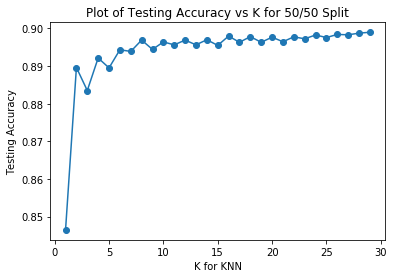

[[17966   325]
 [ 1776   527]]
0.10202000582693989
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     18291
           1       0.62      0.23      0.33      2303

   micro avg       0.90      0.90      0.90     20594
   macro avg       0.76      0.61      0.64     20594
weighted avg       0.88      0.90      0.88     20594



In [4]:
# Drop the duration column for modelling purposes.
bank = bank.drop("duration", 1)

#--------------- Data Modelling - KNN --------------------------

# Preliminaries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as plt

# Encode variables to ensure compatability with classifier algorithm.
from sklearn.preprocessing import LabelEncoder
for column in bank.columns:
    if bank[column].dtype == type(object):
        le = LabelEncoder()
        bank[column] = le.fit_transform(bank[column])
        
        
# Define target variable and dependent variables.
Y = bank.y
X = bank.filter(columns, axis=1)
X = X.drop(columns = 'y')

# 50/50 training/test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=0)

# Run through different k values.
from sklearn import metrics
acc = {}
acc_list = []
krange = range(1,30)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(y_test, predicted)
    acc_list.append(metrics.accuracy_score(y_test, predicted))

# Plot testing accuracy against K values to find optimal K choice.
import matplotlib.pyplot as plt
plt.plot(krange, acc_list, marker='o')
plt.xlabel('K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Plot of Testing Accuracy vs K for 50/50 Split')
plt.show()

# Apply KNN Classifier to 50/50 split
clf = KNeighborsClassifier(16)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, predicted)
print cm

# Compute Classification error rate.
from __future__ import division
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, predicted)

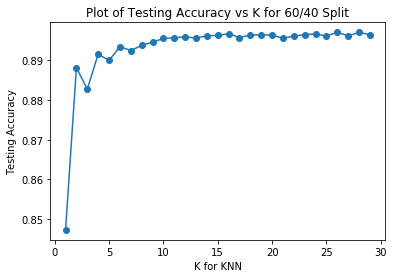

[[14394   212]
 [ 1489   381]]
0.10324107793153678
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     14606
           1       0.64      0.20      0.31      1870

   micro avg       0.90      0.90      0.90     16476
   macro avg       0.77      0.59      0.63     16476
weighted avg       0.88      0.90      0.87     16476



In [5]:
# 60/40 training/test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=4)

# Run through different k values.
acc = {}
acc_list = []
krange = range(1,30)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(y_test, predicted)
    acc_list.append(metrics.accuracy_score(y_test, predicted))

# Plot testing accuracy against K values to find optimal K choice.
plt.plot(krange, acc_list, marker = 'o')
plt.xlabel('K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Plot of Testing Accuracy vs K for 60/40 Split')
plt.show()


# Apply KNN Classifier to 60/40 split
clf = KNeighborsClassifier(16)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, predicted)
print cm

# Compute Classification error rate.
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, predicted)

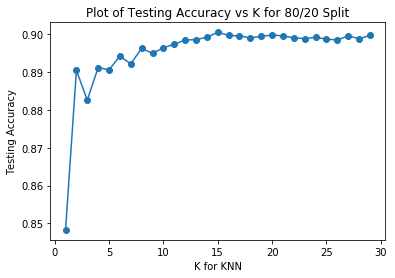

[[7182  126]
 [ 693  237]]
0.09941733430444283
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.65      0.25      0.37       930

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [6]:
# 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=4)

# Run through different k values.
acc = {}
acc_list = []
krange = range(1,30)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(y_test, predicted)
    acc_list.append(metrics.accuracy_score(y_test, predicted))

# Plot testing accuracy against K values to find optimal K choice.
plt.plot(krange, acc_list, marker = 'o')
plt.xlabel('K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Plot of Testing Accuracy vs K for 80/20 Split')
plt.show()


# Apply KNN Classifier to 80/20 split
clf = KNeighborsClassifier(15)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, predicted)
print cm

# Compute Classification error rate.
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, predicted)

In [7]:
# Data Modelling - Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 50/50 training/test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=4)

# Fit decision tree classifier.
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

# Compute predictions on test data.
prediction = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, prediction)
print cm

# Compute Classification error rate.
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, prediction)

[[16476  1763]
 [ 1506   849]]
0.15873555404486744
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     18239
           1       0.33      0.36      0.34      2355

   micro avg       0.84      0.84      0.84     20594
   macro avg       0.62      0.63      0.63     20594
weighted avg       0.85      0.84      0.84     20594



In [8]:
# 60/40 training/test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=4)

# Fit decision tree classifier.
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

# Compute predictions on test data.
prediction = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, prediction)
print cm

# Compute Classification error rate.
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, prediction)

[[13113  1493]
 [ 1226   644]]
0.16502791939791212
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     14606
           1       0.30      0.34      0.32      1870

   micro avg       0.83      0.83      0.83     16476
   macro avg       0.61      0.62      0.61     16476
weighted avg       0.84      0.83      0.84     16476



In [9]:
# 80/20 training/test split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=4)

# Fit decision tree classifier.
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

# Compute predictions on test data.
prediction = fit.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, prediction)
print cm

# Compute Classification error rate.
cer = (cm[0][1] + cm[1][0])/np.sum(cm)
print cer

# Compute precision/recall/F1-score.
print classification_report(y_test, prediction)

[[6613  695]
 [ 624  306]]
0.16011167759164846
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7308
           1       0.31      0.33      0.32       930

   micro avg       0.84      0.84      0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238

